In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('analytical_data_withadditions.csv', sep=';')
target_df = pd.read_csv('20201020_tabular_data/target.csv')

df_l = pd.merge(df, target_df, on = ["tile_h", "tile_v"])
df_predict = df[df.has_target != 1]

In [4]:
# drop non-useful columns for the supervised learning models
drop_cols = ['Unnamed: 0', 'block_size', 'elevation_sd', 'degree_of_slope_sd', 'has_target', 'Name', 'degree_of_slope_min', 'elevation_min', 'Population_1990', 'Population_2000', 'delta_unemployed' ]
df_l.drop(drop_cols, axis=1 ,inplace=True)

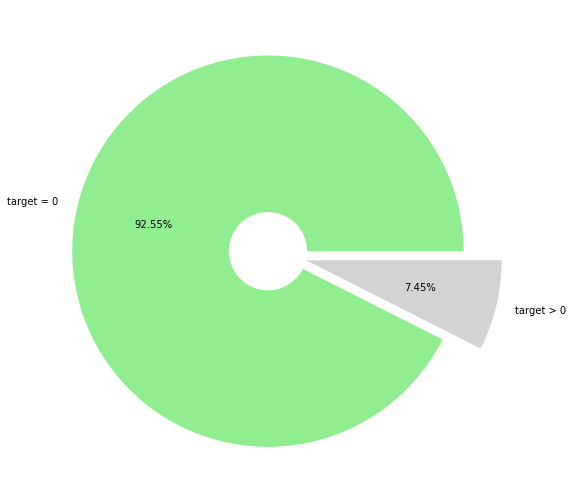

In [5]:
#Most values are zero!
explode = (0, 0.2)
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)

plt.pie([df_l.target[df_l.target == 0].shape[0],df_l.target[df_l.target > 0].shape[0]],
        labels=['target = 0','target > 0'],
        colors=['lightgreen','lightgrey'],
        shadow=False,
        autopct ='%1.2f%%',
        explode=explode
       )
centre_circle = plt.Circle((0,0),0.20,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(9,9)

fig.savefig('piechart.png')

In [5]:
# If I ran immediately a learning regression model I would definitely get overfitting

In [6]:
df_l = df_l.fillna(0)
#Declare targets
y = df_l['target'].values
x=df_l.drop(['target'],axis=1).values

In [7]:
# First I will run a classifier, that will tell me whether target is 0 or a value greater than zero

In [13]:
y_class = np.where(y > 0, 1, 0)

NameError: name 'xrange' is not defined

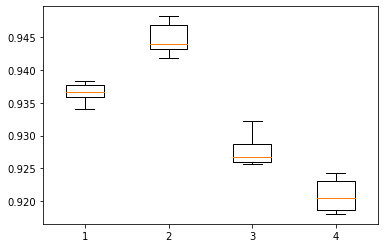

In [17]:

#The splitting can be done using the tools provided by sklearn:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn import metrics

PRC = 0.1
acc_r=np.zeros((10,4))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(x, y_class, test_size=PRC)
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
    svc = svm.SVC()
    dt = tree.DecisionTreeClassifier()
    
    nn1.fit(X_train,y_train)
    nn3.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    
    yhat_nn1=nn1.predict(X_test)
    yhat_nn3=nn3.predict(X_test)
    yhat_svc=svc.predict(X_test)
    yhat_dt=dt.predict(X_test)
    
    acc_r[i][0] = metrics.accuracy_score(yhat_nn1, y_test)
    acc_r[i][1] = metrics.accuracy_score(yhat_nn3, y_test)
    acc_r[i][2] = metrics.accuracy_score(yhat_svc, y_test)
    acc_r[i][3] = metrics.accuracy_score(yhat_dt, y_test)


plt.boxplot(acc_r);
for i in xrange(4):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['1-NN','3-NN','SVM','Decission Tree'])
plt.ylabel('Accuracy')
plt.savefig("error_ms_1.png",dpi=300, bbox_inches='tight')

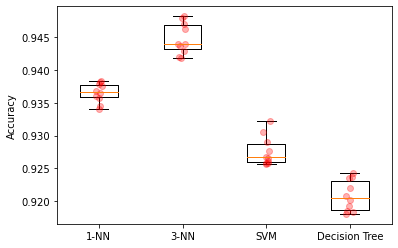

In [28]:
plt.boxplot(acc_r);
for i in range(4):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['1-NN','3-NN','SVM','Decision Tree'])
plt.ylabel('Accuracy')
plt.savefig("error_ms_1.png",dpi=300, bbox_inches='tight')

In [20]:
# The only model that is better at predicting the classifier,than simply saying that all values are 0, are the NN classifiers
# Perhaps I will run a TPOT module to actually see what is the best classifier, but for now I will stick with 3-NN

(array([3.948e+03, 1.293e+03, 7.310e+02, 5.070e+02, 3.150e+02, 2.670e+02,
        1.750e+02, 1.420e+02, 8.300e+01, 7.900e+01, 5.700e+01, 4.500e+01,
        3.200e+01, 3.700e+01, 1.600e+01, 1.500e+01, 1.900e+01, 1.100e+01,
        1.200e+01, 5.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 5.000e+00,
        3.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  30.9,  60.8,  90.7, 120.6, 150.5, 180.4, 210.3, 240.2,
        270.1, 300. , 329.9, 359.8, 389.7, 419.6, 449.5, 479.4, 509.3,
        539.2, 569.1, 599. , 628.9, 658.8, 688.7, 718.6, 748.5, 778.4,
        808.3, 838.2, 868.1, 898. ]),
 <a list of 30 Patch objects>)

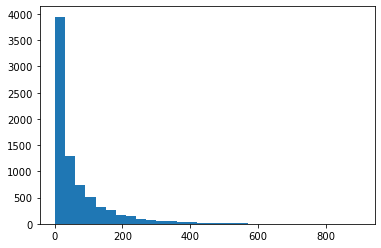

In [21]:
#Let's see values that are not zero
plt.hist(df_l.target[df_l.target != 0],bins=30)

(array([1.00923e+05, 1.30100e+03, 7.46000e+02, 5.15000e+02, 3.22000e+02,
        2.64000e+02, 1.85000e+02, 1.39000e+02, 8.40000e+01, 8.30000e+01,
        5.70000e+01, 4.50000e+01, 3.20000e+01, 3.70000e+01, 1.50000e+01,
        1.60000e+01, 1.80000e+01, 1.10000e+01, 1.30000e+01, 5.00000e+00,
        2.00000e+00, 4.00000e+00, 4.00000e+00, 5.00000e+00, 3.00000e+00,
        4.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0.        ,  29.93333333,  59.86666667,  89.8       ,
        119.73333333, 149.66666667, 179.6       , 209.53333333,
        239.46666667, 269.4       , 299.33333333, 329.26666667,
        359.2       , 389.13333333, 419.06666667, 449.        ,
        478.93333333, 508.86666667, 538.8       , 568.73333333,
        598.66666667, 628.6       , 658.53333333, 688.46666667,
        718.4       , 748.33333333, 778.26666667, 808.2       ,
        838.13333333, 868.06666667, 898.        ]),
 <a list of 30 Patch objects>)

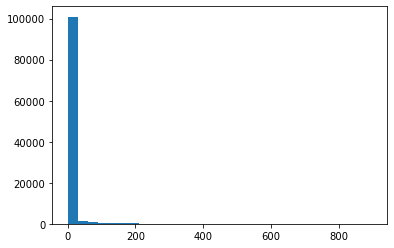

In [22]:
#just for reference, this would've been the graph with even the zeros
plt.hist(df_l.target,bins=30)

In [23]:
# It's clear that I would've been very messy to consider only a regression, perhaps a better solution would've been running a neuronal network

In [24]:
# Let's train the data for target > 0

In [25]:
y_regr = df_l.target[df_l['target']>0].values
x_regr=df_l[df_l['target']>0].drop(['target'],axis=1).values

In [26]:
np.shape(x_regr)

(7813, 23)

In [27]:
np.shape(y_regr)

(7813,)

In [67]:
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn import metrics

PRC = 0.1
me_r=np.zeros((10,4))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(x_regr, y_regr, test_size=PRC)
    nn5 = neighbors.KNeighborsRegressor(n_neighbors=5)
    nn26 = neighbors.KNeighborsRegressor(n_neighbors=26)
    svr = svm.SVR()
    dt = tree.DecisionTreeRegressor()
    
    nn5.fit(X_train,y_train)
    nn26.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    
    yhat_nn5=nn5.predict(X_test)
    yhat_nn26=nn26.predict(X_test)
    yhat_svc=svc.predict(X_test)
    yhat_dt=dt.predict(X_test)
    
    me_r[i][0] = metrics.mean_absolute_error(yhat_nn5, y_test)
    me_r[i][1] = metrics.mean_absolute_error(yhat_nn26, y_test)
    me_r[i][2] = metrics.mean_absolute_error(yhat_svc, y_test)
    me_r[i][3] = metrics.mean_absolute_error(yhat_dt, y_test)

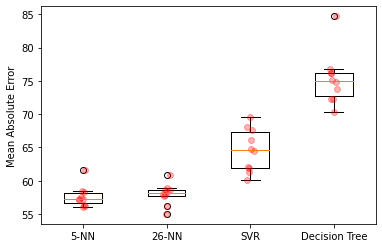

In [68]:
plt.boxplot(me_r);
for i in range(4):
    xderiv = (i+1)*np.ones(me_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,me_r[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['5-NN','26-NN','SVR','Decision Tree'])
plt.ylabel('Mean Absolute Error')
plt.savefig("error_ms_1.png",dpi=300, bbox_inches='tight')

# So for now I will provide these results, I will be running a proper pipeline with TPOT meanwhile, but wanted to at least give some
# code by noon

In [36]:
# Five neighbors is for now the best regressor
# 3 NN is the best classifier

In [37]:
"""Predicting the target"""

'Predicting the target'

In [75]:
#df_predict.drop(drop_cols, axis=1 ,inplace=True)
df_predict = df_predict.fillna(0)
X_predict=df_predict.values
y_predict_c = nn3.predict(X_predict)

In [76]:
y_predict_c

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
nonzeros = (np.where(y_predict_c > 0)[0]).tolist()
X_predict_regr = X_predict[nonzeros, :]

In [78]:
y_predict_regr = nn5.predict(X_predict_regr)

In [79]:
y_final = [0]*np.shape(y_predict_c)[0]
i = 0
j = 0
for value in y_predict_c:
    if value != 0:
        y_final[i] = y_predict_regr[j]
        j += 1
    
    i += 1


In [80]:
print(np.shape(y_final))

(44927,)


In [84]:
df_submission = pd.DataFrame()
df_submission['tile_h'] = df_predict['tile_h']
df_submission['tile_v'] = df_predict['tile_v']
df_submission['prediction'] = y_final

In [85]:
df_submission.head()

,tile_h,tile_v,prediction
0,5412,0,0.0
1,5445,0,0.0
5,5577,0,0.0
6,5610,0,0.0
7,5643,0,0.0


In [86]:
df_submission.prediction.describe()

count    44927.000000
mean         4.243528
std         22.773077
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        440.800000
Name: prediction, dtype: float64

In [87]:
df_submission.to_csv('20201023103923_stenodeevee.csv', sep=',', encoding='utf-8')

In [88]:
"""
FYI: the final model is probably going to be found using TPOT, with the same modularity, but it predicts the best model
Here's how I am going to do it this afternoon, it takes time to converge and tonight something went wrong with it so I had to show 
at least some results :)

% Classifier
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_classifier.py')

% Regressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_regressor.py')


"""

"\nFYI: the final model is probably going to be found using TPOT, with the same modularity, but it predicts the best model\nHere's how I am going to do it this afternoon, it takes time to converge and tonight something went wrong with it so I had to show \nat least some results :)\n\n% Classifier\ntpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)\ntpot.fit(X_train, y_train)\nprint(tpot.score(X_test, y_test))\ntpot.export('tpot_classifier.py')\n\n% Regressor\ntpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)\ntpot.fit(X_train, y_train)\nprint(tpot.score(X_test, y_test))\ntpot.export('tpot_regressor.py')\n\n\n"